<a href="https://colab.research.google.com/github/skourta/CrowdOrganizer/blob/master/Flag_Landmass_Prediction_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sb

In [31]:
flags = pd.read_csv('flags.csv',header=0)
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,Red,Green,Blue,Gold,White,Black,Orange,Mainhue,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [32]:
labels = flags['Landmass']
labels

0      5
1      3
2      4
3      6
4      3
      ..
189    6
190    3
191    4
192    4
193    4
Name: Landmass, Length: 194, dtype: int64

In [33]:
data = flags[["Red", "Green", "Blue", "Gold",
 "White", "Black", "Orange",
 "Circles",
"Crosses","Saltires","Quarters","Sunstars",
"Crescent","Triangle"]]
data.shape

(194, 14)

In [38]:
train_data, test_data, train_labels, test_labels = train_test_split(data,labels,random_state = 1)
train_data.head()

,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle
107,1,1,0,1,0,0,0,0,0,0,0,0,0,0
42,1,0,1,0,1,0,0,0,0,0,0,0,0,0
17,1,1,1,1,1,1,1,1,0,0,0,0,0,0
5,1,0,0,1,0,1,0,0,0,0,0,1,0,0
117,1,1,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(train_data,train_labels)
tree.score(test_data,test_labels)

0.4489795918367347

In [0]:
scores = []
for i in range(1,21):
    tree = DecisionTreeClassifier(random_state=1,max_depth=i)
    tree.fit(train_data,train_labels)
    scores.append(tree.score(test_data, test_labels))

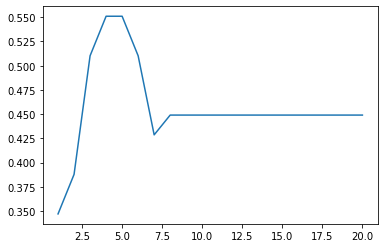

In [37]:
plt.plot(range(1, 21), scores)
plt.show()

In [58]:
tree.predict(pd.DataFrame([[1,1,0,0,1,0,0,0,0,0,0,1,1,0]]))[0]

4